# Packages inladen

In [1]:
import pandas as pd # Voor het verwerken van alle data
import numpy as np # Voor alle numerieke operaties
import sklearn # De library met Machine Learning technieken
import matplotlib.pyplot as plt # Visualisatie tool

# Data exploration

In [2]:
# Het inladen van tabellen. Dit wordt gezet in een "DataFrame"
df = pd.read_csv("../3dprinter/data.csv", sep = ';')
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [3]:
# Onze voorspellers moet het materiaal gaan voorspellen. We willen niet dat we het materiaal als gegeven zien. Dan wordt het wel heel makkelijk!
X = df.drop("material", axis = 1)

# Onze afhankelijke waarde is de kolom "materiaal"
Y = df.material

X.head() # Hier zien we dat de infill pattern 1 en 0 zijn geworden. En de kolom material staat er niet meer in

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,1,220,60,40,0,25,18,1.2
1,0.02,7,90,0,225,65,40,25,32,16,1.4
2,0.02,1,80,1,230,70,40,50,40,8,0.8
3,0.02,4,70,0,240,75,40,75,68,10,0.5
4,0.02,6,90,1,250,80,40,100,92,5,0.7


In [4]:
# Y is nu een "Series" met 1 en 0 voor "abs" en "pla".
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: material, dtype: int64

# Making a model

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 2)

In [21]:
from sklearn.svm import SVC
clf = SVC(kernel = "rbf")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

0.64


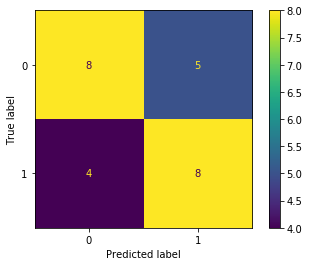

In [22]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(clf, x_test, y_test)

0.72


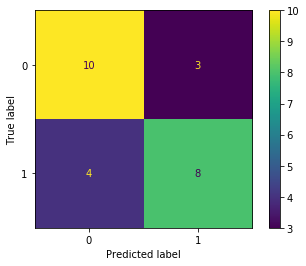

In [23]:
clf = SVC(kernel = "poly")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(clf, x_test, y_test)

1.0


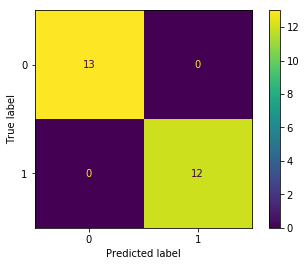

In [24]:
clf = SVC(kernel = "linear")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(clf, x_test, y_test)